# Import Library

In [ ]:
pip install pytorch-tabnet shap seaborn pandas numpy matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ----------------------- ---------------- 30.7/52.8 kB ? eta -:--:--
     -------------------------------------- 52.8/52.8 kB 906.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------- ------------------ 61.4/116.4 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ----------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import shap

import warnings
warnings.filterwarnings('ignore')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EDA

In [ ]:
import os
current_directory = os.getcwd()

file_path = os.path.join(current_directory, "botswana_bank_customer_churn.csv")

df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)         
pd.set_option('display.max_colwidth', None)   

display(df.head(15))    

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Address,Contact Information,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,"26644 Diaz Viaduct\nNorth Jessicaville, VI 14852",001-301-934-3058x0825,30,Retail,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,"5642 Rachel Pass Suite 320\nPort Peggy, RI 75805",+1-581-683-4267,27,SME,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,"00025 Brittany Flats Apt. 543\nNew Amandaborough, MH 69279",9753900004,14,Retail,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,Unit 3386 Box 0088\nDPO AE 71940,+1-928-477-2856x660,23,Corporate,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,"0120 Leslie River\nWest Lindseychester, MN 98290",204.515.2388,22,Corporate,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6
5,6,c18b027e-b108-4900-b413-dac87e2ee9b5,Gonzales,Ashley,1987-11-28,Male,Single,0,"Surveyor, building",55608.75,Bachelor's,"PSC 3787, Box 9869\nAPO AP 62324",001-880-967-5883x0508,15,Retail,Email,809,27,37218.81,1,Account Closure,2024-07-31,31206.81,2,10
6,7,7091e271-7d2b-4e73-934f-8398e2a1dcbc,Wilcox,Daniel,1976-09-07,Female,Single,1,Publishing copy,22032.61,Diploma,"983 Adams Coves\nLake Roberto, MP 82550",4756961139,15,Retail,Email,690,29,26200.00,0,NaN,NaN,198443.50,2,1
7,8,d5e80b75-bd3f-4d8a-b847-0868f8eb9e40,Lopez,Johnny,1993-08-05,Male,Divorced,4,Industrial buyer,73462.72,Diploma,"905 Jackson View Suite 009\nSouth Amymouth, PA 54407",001-577-988-4031x4410,3,Corporate,Email,605,30,25156.25,0,NaN,NaN,96378.05,4,6
8,9,9eba62c1-0af0-4424-9218-435ece0689aa,Miles,Kelly,2001-08-03,Male,Divorced,3,Medical sales representative,30054.43,Bachelor's,"6398 Morgan Knolls\nJulieborough, NH 55183",001-245-374-7034x4970,20,Corporate,Phone,634,16,41854.08,0,NaN,NaN,108395.17,5,1
9,10,4eea7068-ea07-4898-bb04-6ccd8b729fc9,Thompson,Anthony,1991-01-12,Female,Divorced,5,Media buyer,24129.53,Master's,"674 Reed Islands\nLoweville, TX 67579",+1-814-630-2270x6096,21,SME,Phone,831,10,30914.02,0,NaN,NaN,99830.84,4,5


Drop Columns wont used

In [ ]:
df.isnull().sum()

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [ ]:
df['Occupation'].nunique()

639

### Cek Occupation

In [ ]:
pd.set_option('display.max_rows', None)
df['Occupation'].value_counts()

Occupation
Engineer, materials                                            222
Biochemist, clinical                                           218
Contractor                                                     217
Surveyor, building                                             215
Surveyor, commercial/residential                               215
Pharmacist, hospital                                           214
Quarry manager                                                 214
Surveyor, land/geomatics                                       214
Engineer, broadcasting (operations)                            213
Ambulance person                                               213
Designer, interior/spatial                                     213
Metallurgist                                                   212
Research scientist (medical)                                   211
Conservator, museum/gallery                                    210
Journalist, newspaper                              

In [ ]:
df['Occupation'].unique()

array(['Information systems manager', 'Charity fundraiser',
       'Television production assistant', 'Agricultural engineer',
       'Teacher, early years/pre', 'Surveyor, building',
       'Publishing copy', 'Industrial buyer',
       'Medical sales representative', 'Media buyer', 'Sales executive',
       'Engineer, biomedical', 'Development worker, international aid',
       'Health and safety adviser', 'Scientist, research (maths)',
       'Soil scientist', 'Animal nutritionist',
       'Secondary school teacher', 'Civil Service administrator',
       'Engineer, site', 'Engineer, civil (contracting)',
       'Psychotherapist, child', 'Conference centre manager',
       'Product/process development scientist', 'Broadcast engineer',
       'Patent attorney', 'Insurance claims handler', 'Police officer',
       'Counselling psychologist', 'Insurance account manager',
       'Theatre stage manager', 'Research scientist (life sciences)',
       'Multimedia programmer', 'Designer, inter

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
import re
import pandas as pd

print("Unique Occupation:", df['Occupation'].nunique())

def _norm(s: str) -> str:
    s = str(s).lower()
    s = re.sub(r"[^\w\s/+-]", " ", s)       
    s = re.sub(r"\s+", " ", s).strip()
    return s

CATEGORY_KEYWORDS = [
    ("Technology", [
        "software", "data scientist", "data science", "data analyst", "systems analyst",
        "it ", "it-", "it/", "developer", "programmer", "engineer, maintenance (it)",
        "applications developer", "network engineer", "database administrator",
        "technical support", "computer", "multimedia programmer", "web designer",
        "games developer", "information systems", "chief technology officer"
    ]),
    ("Finance", [
        "accountant", "chartered accountant", "auditor", "tax", "actuary",
        "finance", "financial", "banker", "investment", "trader", "treasurer",
        "controller", "comptroller", "insurer", "insurance", "pensions",
        "broker (?!ship)", "risk analyst", "financial planner", "chartered certified"
    ]),
    ("Healthcare", [
        "doctor", "physician", "surgeon", "nurse", "midwife", "paramedic", "dentist",
        "optometrist", "ophthalmologist", "pharmacist", "pharmacy", "radiograph",
        "therapist", "psychotherapist", "psychiatr", "clinical", "biomed",
        "podiatrist", "orthoptist", "pathologist", "oncologist", "haematolog",
        "neurosurgeon", "hospital", "medical secretary", "community pharmacist"
    ]),
    ("Education", [
        "teacher", "lecturer", "professor", "tutor", "education officer",
        "learning mentor", "further education", "higher education", "academic librarian",
        "tefl", "english as a foreign", "education administrator"
    ]),
    ("Engineering & Construction", [
        "engineer", "engineering", "architect", "architectural", "building services",
        "structural", "civil", "site engineer", "maintenance engineer",
        "geotechn", "drilling", "automotive", "aeronautical", "mechanical",
        "manufacturing engineer", "mining engineer", "petroleum engineer",
        "water engineer", "land ", "rural practice", "quantity surveyor",
        "building surveyor", "survey(?!or of people)"  # surveyor family
    ]),
    ("Science & Research", [
        "scientist", "physicist", "chemist", "biochem", "geochem", "geologist",
        "geoscientist", "ecologist", "immunolog", "astronomer", "hydrolog",
        "oceanograph", "meteorolog", "seismolog", "research", "laboratory",
        "forensic"
    ]),
    ("Legal", [
        "lawyer", "solicitor", "barrister", "legal", "attorney", "patent", "licenced conveyancer",
        "chartered legal executive"
    ]),
    ("Media & Creative", [
        "journalist", "editor", "producer", "presenter", "broadcast", "television",
        "film", "video", "copywriter", "copy", "photograph", "illustrator",
        "designer", "graphic", "fashion designer", "textile", "make ", "gaffer",
        "stage manager", "theatre", "artist", "musician", "animator", "curator",
        "museum", "gallery"
    ]),
    ("Sales & Marketing", [
        "sales", "marketing", "merchandiser", "media buyer", "advertising",
        "public relations", "account manager", "customer service", "call centre",
        "retail", "buyer", "product manager"
    ]),
    ("Public Sector & Gov", [
        "civil service", "government", "diplomatic", "local government",
        "administrator, civil service", "policy", "trade union", "ranger/warden",
        "armed forces", "police", "prison officer"
    ]),
    ("Operations & Logistics", [
        "logistics", "distribution", "warehouse", "transport", "freight",
        "operations", "facilities manager", "purchasing manager", "procurement"
    ]),
    ("Hospitality & Retail Services", [
        "restaurant", "hotel", "catering", "barista", "public house manager",
        "fast food", "tour manager", "tourism", "holiday representative"
    ]),
    ("Social Services & Psychology", [
        "psycholog", "counsellor", "social worker", "community development",
        "youth worker", "careers adviser", "occupational psychologist"
    ]),
    ("Environment & Agriculture", [
        "agric", "hortic", "forestry", "conservation", "environment",
        "water quality", "soil", "amenity horticulturist", "mudlogger"
    ]),
    ("Energy & Mining", [
        "mining", "petroleum", "oil", "gas", "energy", "seismic", "geophysic",
        "wellsite", "drilling", "hydrogeolog"
    ]),
    ("Aviation & Maritime", [
        "airline pilot", "pilot", "air traffic", "naval", "ship broker", "merchant navy"
    ]),
    ("Admin & Management", [
        "manager", "administrator", "chief executive officer", "chief operating officer",
        "chief marketing officer", "chief strategy officer", "chief of staff",
        "company secretary", "secretary, company", "office manager"
    ]),
]

def map_occupation_category(raw: str) -> str:
    s = _norm(raw)
    if not s:
        return "Other"
    for cat, kws in CATEGORY_KEYWORDS:
        for kw in kws:
            if re.search(rf"\b{kw}\b", s):
                return cat
    return "Other"

df['Occupation_Group'] = df['Occupation'].apply(map_occupation_category)

Unique Occupation: 639


In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Address,Contact Information,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints,Occupation_Group
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,"26644 Diaz Viaduct\nNorth Jessicaville, VI 14852",001-301-934-3058x0825,30,Retail,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0,Technology
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,"5642 Rachel Pass Suite 320\nPort Peggy, RI 75805",+1-581-683-4267,27,SME,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1,Other
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,"00025 Brittany Flats Apt. 543\nNew Amandaborough, MH 69279",9753900004,14,Retail,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6,Media & Creative
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,Unit 3386 Box 0088\nDPO AE 71940,+1-928-477-2856x660,23,Corporate,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0,Engineering & Construction
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,"0120 Leslie River\nWest Lindseychester, MN 98290",204.515.2388,22,Corporate,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6,Education
5,6,c18b027e-b108-4900-b413-dac87e2ee9b5,Gonzales,Ashley,1987-11-28,Male,Single,0,"Surveyor, building",55608.75,Bachelor's,"PSC 3787, Box 9869\nAPO AP 62324",001-880-967-5883x0508,15,Retail,Email,809,27,37218.81,1,Account Closure,2024-07-31,31206.81,2,10,Other
6,7,7091e271-7d2b-4e73-934f-8398e2a1dcbc,Wilcox,Daniel,1976-09-07,Female,Single,1,Publishing copy,22032.61,Diploma,"983 Adams Coves\nLake Roberto, MP 82550",4756961139,15,Retail,Email,690,29,26200.00,0,NaN,NaN,198443.50,2,1,Media & Creative
7,8,d5e80b75-bd3f-4d8a-b847-0868f8eb9e40,Lopez,Johnny,1993-08-05,Male,Divorced,4,Industrial buyer,73462.72,Diploma,"905 Jackson View Suite 009\nSouth Amymouth, PA 54407",001-577-988-4031x4410,3,Corporate,Email,605,30,25156.25,0,NaN,NaN,96378.05,4,6,Sales & Marketing
8,9,9eba62c1-0af0-4424-9218-435ece0689aa,Miles,Kelly,2001-08-03,Male,Divorced,3,Medical sales representative,30054.43,Bachelor's,"6398 Morgan Knolls\nJulieborough, NH 55183",001-245-374-7034x4970,20,Corporate,Phone,634,16,41854.08,0,NaN,NaN,108395.17,5,1,Sales & Marketing
9,10,4eea7068-ea07-4898-bb04-6ccd8b729fc9,Thompson,Anthony,1991-01-12,Female,Divorced,5,Media buyer,24129.53,Master's,"674 Reed Islands\nLoweville, TX 67579",+1-814-630-2270x6096,21,SME,Phone,831,10,30914.02,0,NaN,NaN,99830.84,4,5,Sales & Marketing


### Drop Columns

In [ ]:
drop_cols = [
    'RowNumber',
    'CustomerId',
    'Surname',
    'First Name',
    'Address',
    'Contact Information',
    
    'Churn Reason',
    'Churn Date',
    
    'Date of Birth',       
    'Occupation',            
]

df = df.drop(columns=drop_cols, errors='ignore')

print("Kolom tersisa setelah pembersihan:")
print(df.columns.tolist())

Kolom tersisa setelah pembersihan:
['Gender', 'Marital Status', 'Number of Dependents', 'Income', 'Education Level', 'Customer Tenure', 'Customer Segment', 'Preferred Communication Channel', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Churn Flag', 'Balance', 'NumOfProducts', 'NumComplaints', 'Occupation_Group']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           115640 non-null  object 
 1   Marital Status                   115640 non-null  object 
 2   Number of Dependents             115640 non-null  int64  
 3   Income                           115640 non-null  float64
 4   Education Level                  115640 non-null  object 
 5   Customer Tenure                  115640 non-null  int64  
 6   Customer Segment                 115640 non-null  object 
 7   Preferred Communication Channel  115640 non-null  object 
 8   Credit Score                     115640 non-null  int64  
 9   Credit History Length            115640 non-null  int64  
 10  Outstanding Loans                115640 non-null  float64
 11  Churn Flag                       115640 non-null  int64  
 12  Ba

In [ ]:
df.isna().sum()

Gender                             0
Marital Status                     0
Number of Dependents               0
Income                             0
Education Level                    0
Customer Tenure                    0
Customer Segment                   0
Preferred Communication Channel    0
Credit Score                       0
Credit History Length              0
Outstanding Loans                  0
Churn Flag                         0
Balance                            0
NumOfProducts                      0
NumComplaints                      0
Occupation_Group                   0
dtype: int64

In [ ]:
df.describe()

,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,124639.209748,2.999274,4.991724
std,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,72210.476638,1.411361,3.159283
min,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,1.060000,1.000000,0.000000
25%,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000
50%,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000
75%,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000
max,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000


In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'{column}: {unique_values} unique values')

Gender: 2 unique values
Marital Status: 3 unique values
Number of Dependents: 6 unique values
Income: 114953 unique values
Education Level: 4 unique values
Customer Tenure: 30 unique values
Customer Segment: 3 unique values
Preferred Communication Channel: 2 unique values
Credit Score: 551 unique values
Credit History Length: 30 unique values
Outstanding Loans: 114298 unique values
Churn Flag: 2 unique values
Balance: 115387 unique values
NumOfProducts: 5 unique values
NumComplaints: 11 unique values
Occupation_Group: 18 unique values


## Visualisasi Data

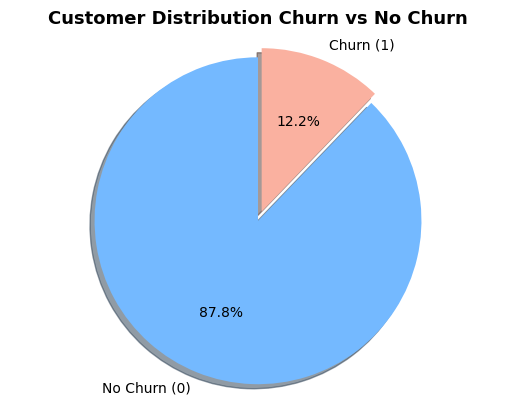

In [ ]:

colors = ['#74b9ff', '#fab1a0']

# Pie chart tetap jalan dengan angka 0 dan 1
df['Churn Flag'].value_counts().plot.pie(
    labels=['No Churn (0)', 'Churn (1)'],  
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.03, 0.03),
    shadow=True
)

plt.title('Customer Distribution Churn vs No Churn', fontsize=13, fontweight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

Numeric columns: ['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Churn Flag', 'Balance', 'NumOfProducts', 'NumComplaints']


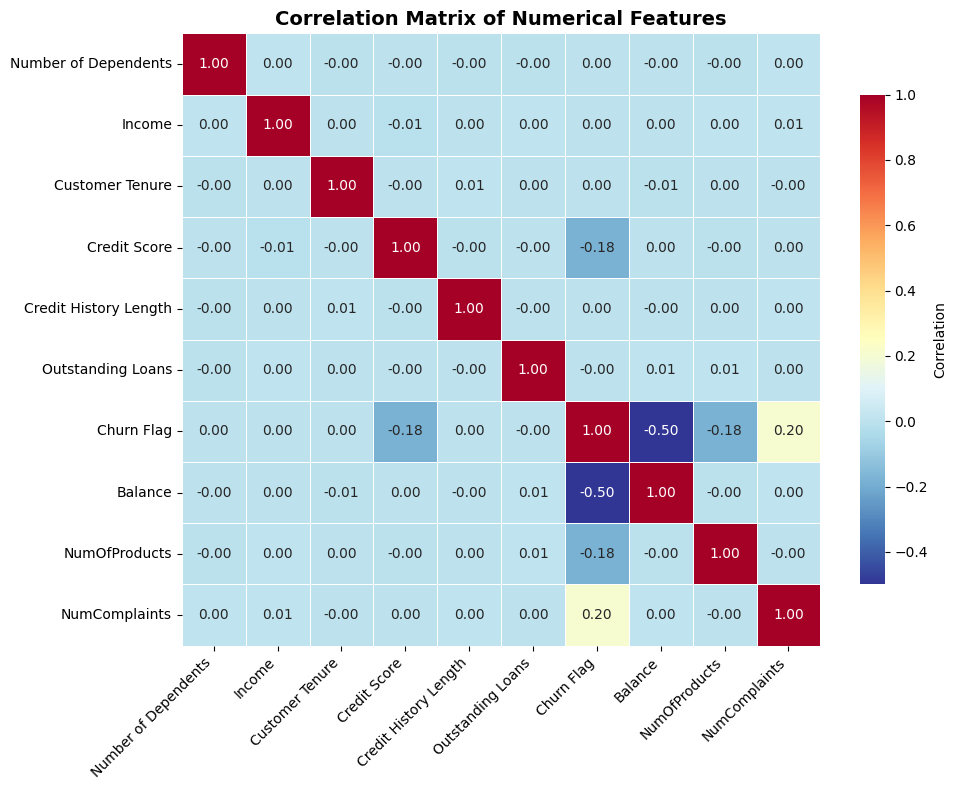

In [ ]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_columns))

corr_matrix = df[numeric_columns].corr()

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,            
    cmap='RdYlBu_r',      
    fmt='.2f',             
    linewidths=0.5,        
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'} 
)

plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

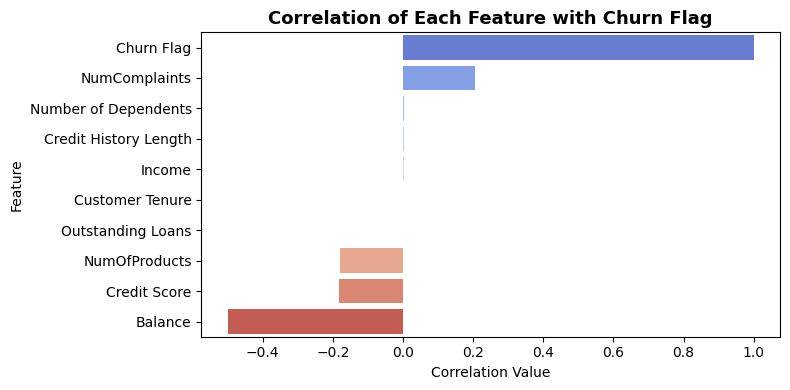

In [ ]:

plt.figure(figsize=(8, 4))
corr_with_target = corr_matrix['Churn Flag'].sort_values(ascending=False)
sns.barplot(x=corr_with_target, y=corr_with_target.index, palette='coolwarm')
plt.title('Correlation of Each Feature with Churn Flag', fontsize=13, fontweight='bold')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Numeric features: ['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']


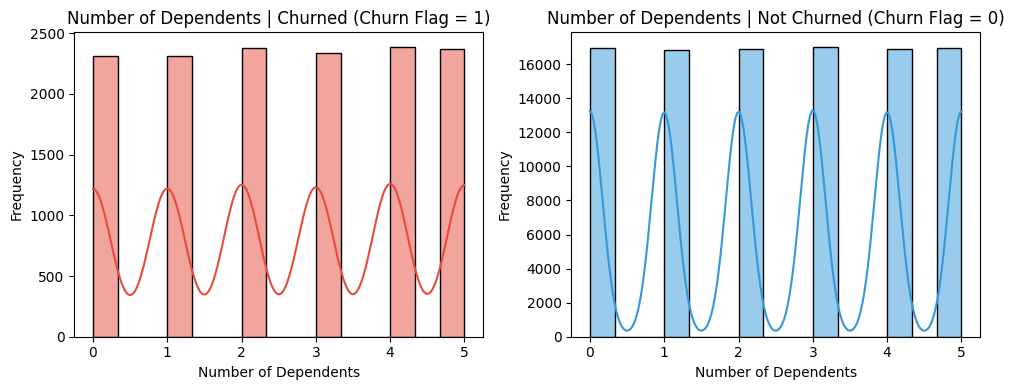

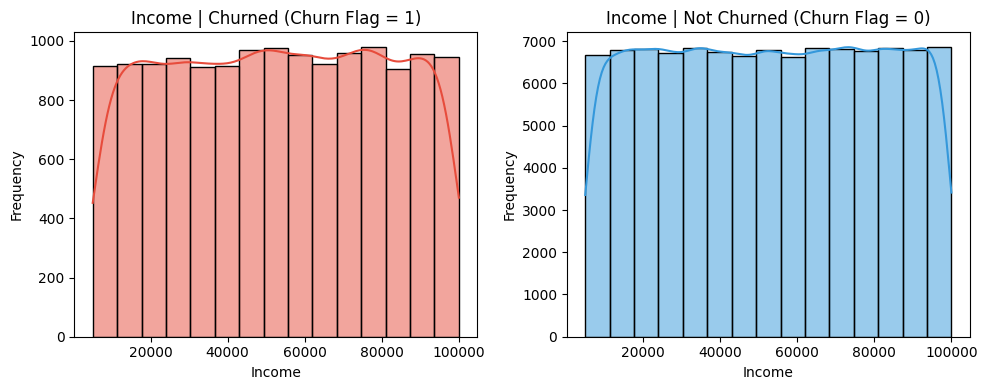

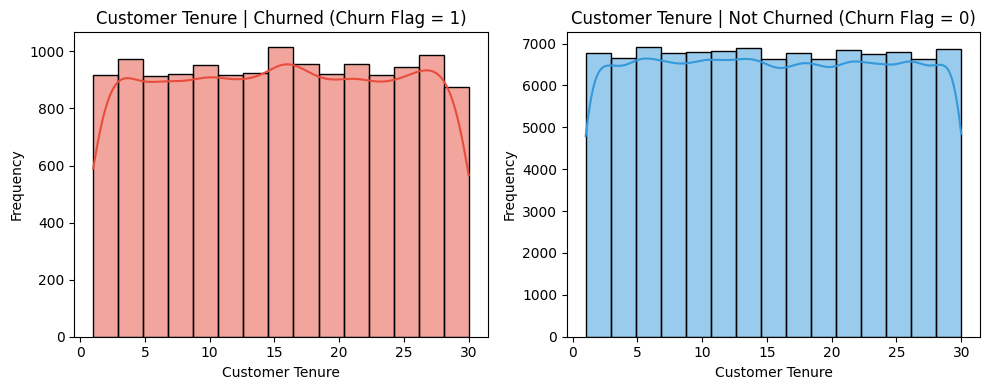

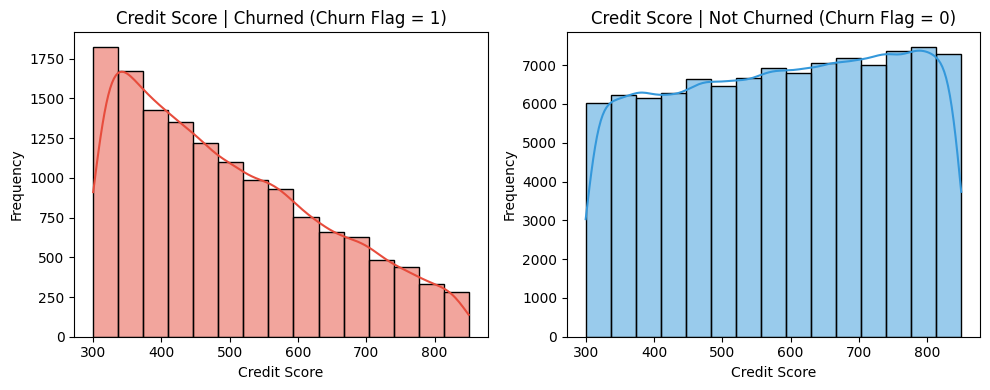

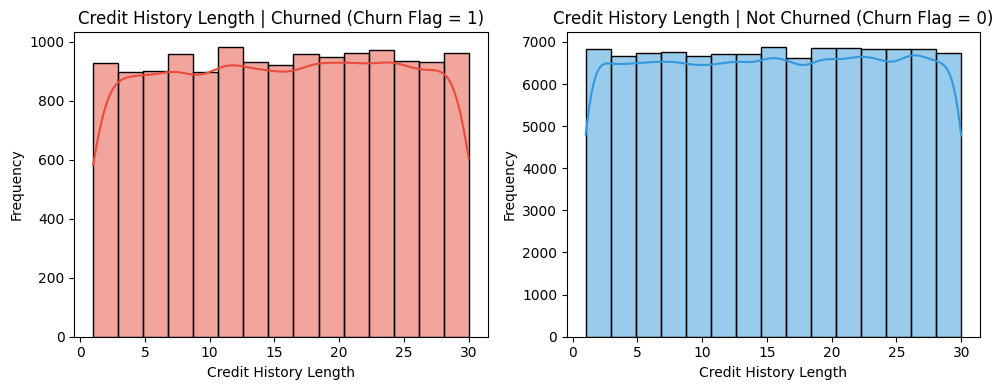

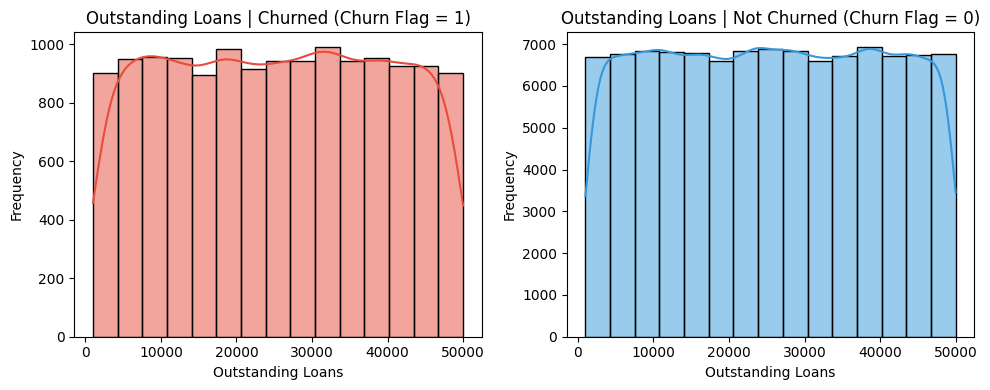

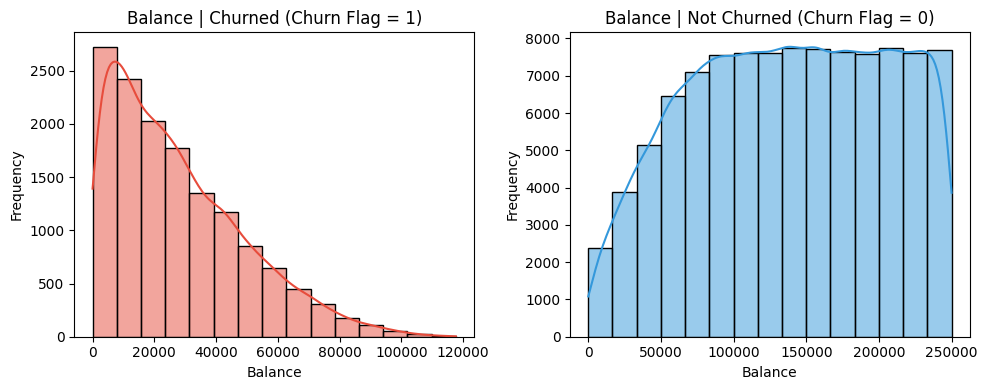

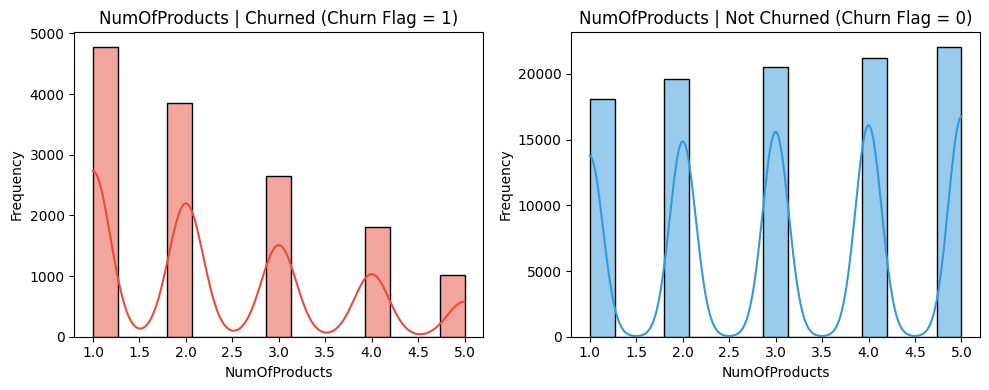

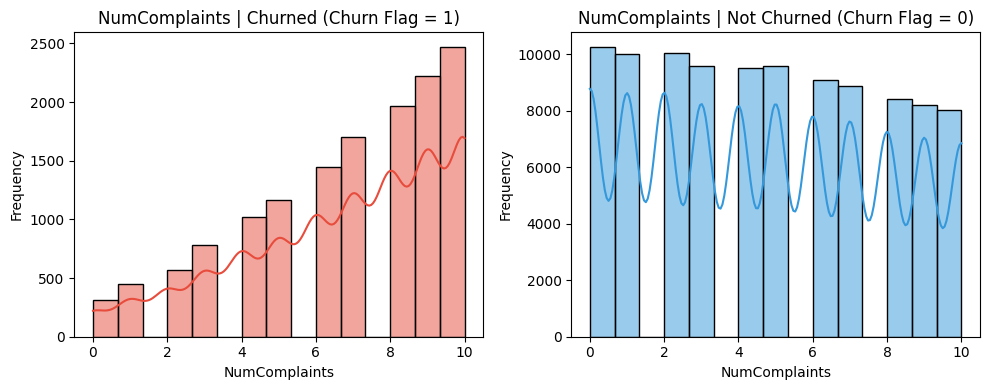

In [ ]:

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn Flag')
print("Numeric features:", list(numeric_features))

for col in numeric_features:
    plt.figure(figsize=(10, 4))

    # Left subplot: Churned customers (Churn Flag = 1)
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['Churn Flag'] == 1][col], bins=15, kde=True, color='#e74c3c')
    plt.title(f'{col} | Churned (Churn Flag = 1)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Right subplot: Non-churned customers (Churn Flag = 0)
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['Churn Flag'] == 0][col], bins=15, kde=True, color='#3498db')
    plt.title(f'{col} | Not Churned (Churn Flag = 0)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

Numeric features: ['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']


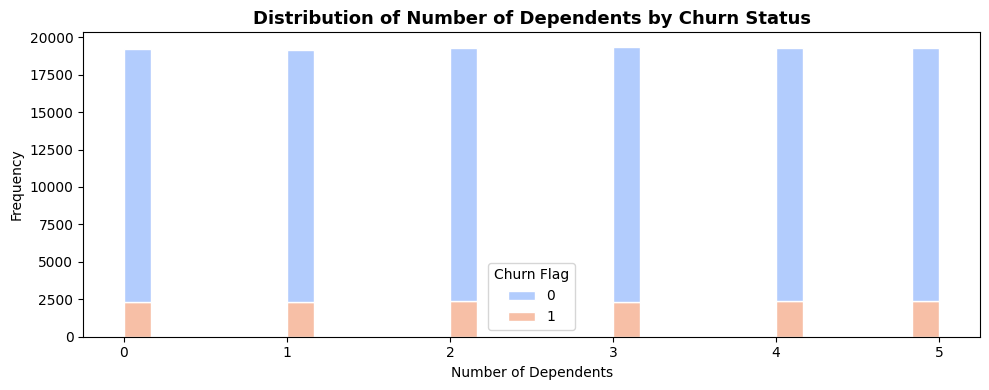

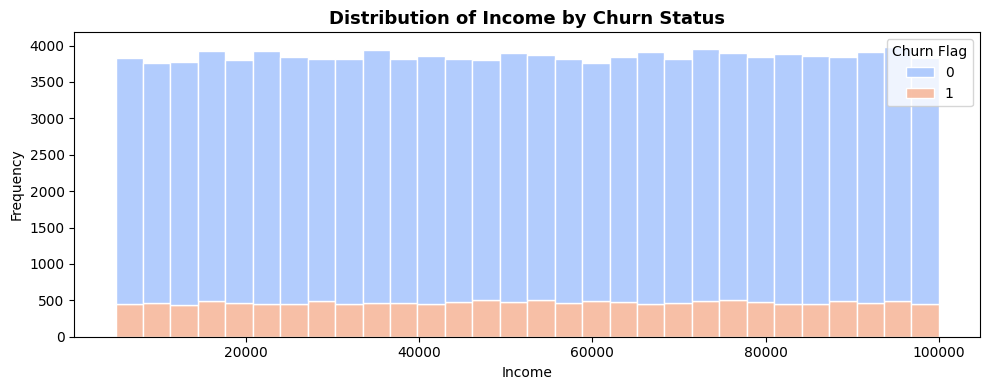

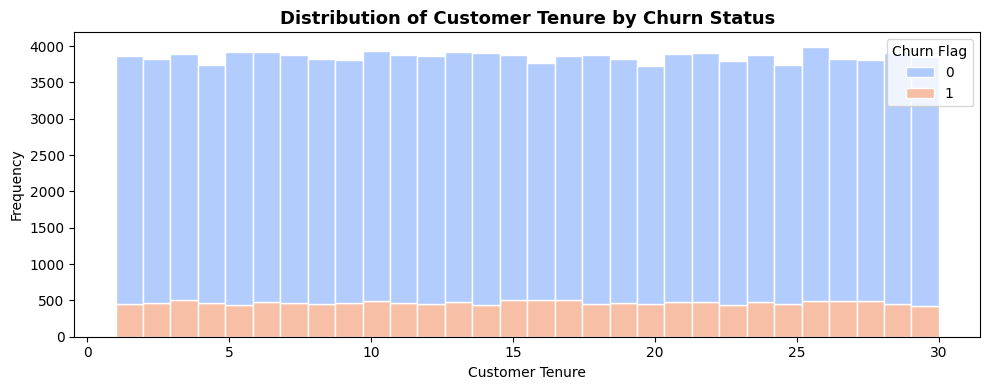

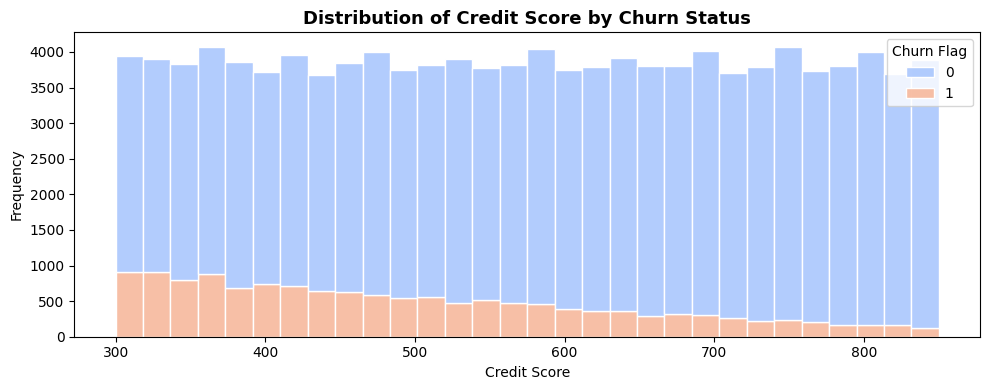

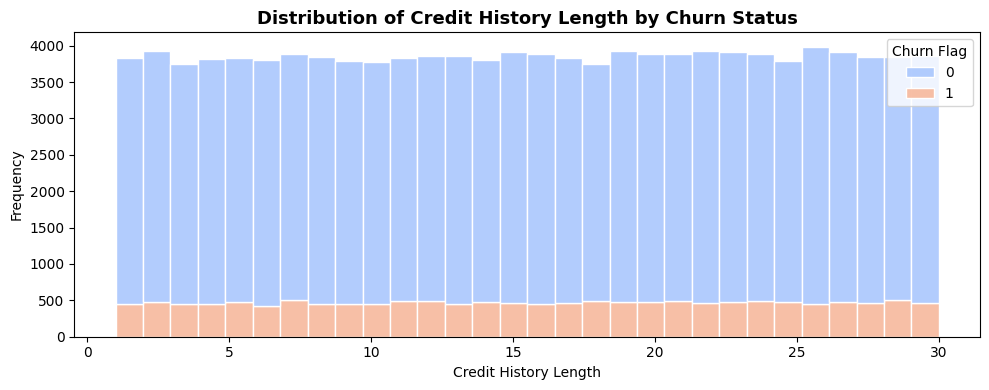

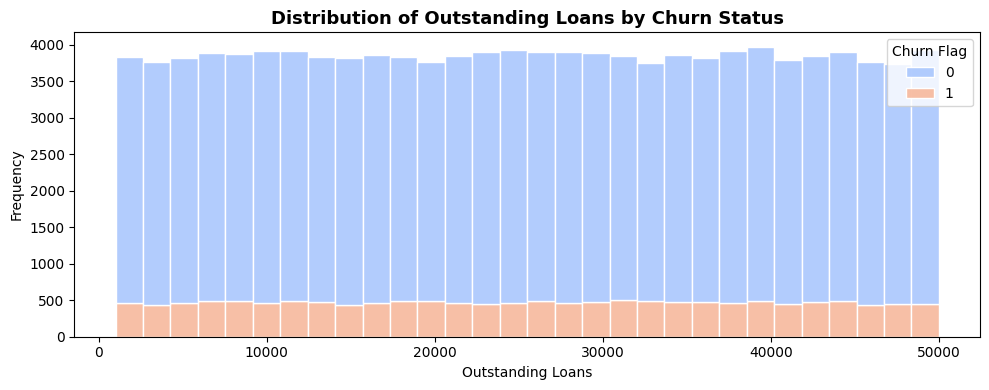

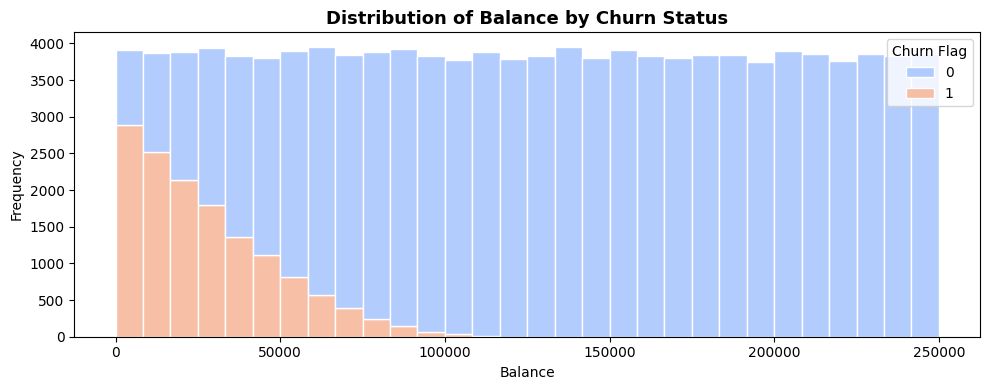

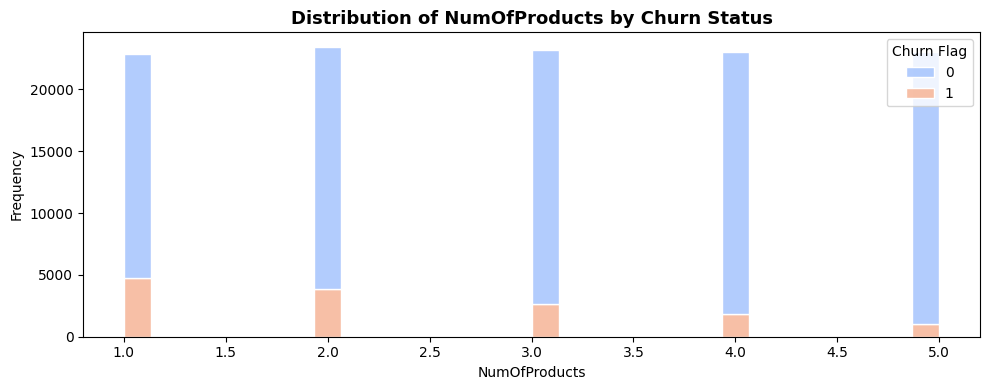

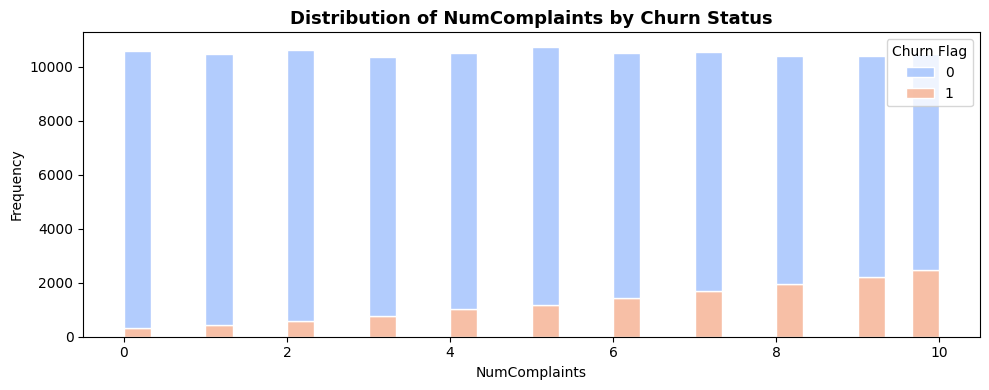

In [ ]:
# Select numeric columns except the target (Churn Flag)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn Flag')
print("Numeric features:", list(numeric_features))

# Loop through each numeric feature
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    
    # Stacked histogram by churn status
    sns.histplot(
        data=df,
        x=col,
        hue='Churn Flag',          # Color by churn category
        multiple='stack',          # Stack both categories on top of each other
        palette='coolwarm',        # Professional contrasting color palette
        bins=30,                   # Number of histogram bins
        edgecolor='white',         # White borders for clarity
        alpha=0.9                  # Slight transparency
    )
    
    plt.title(f'Distribution of {col} by Churn Status', fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Numeric features: ['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']


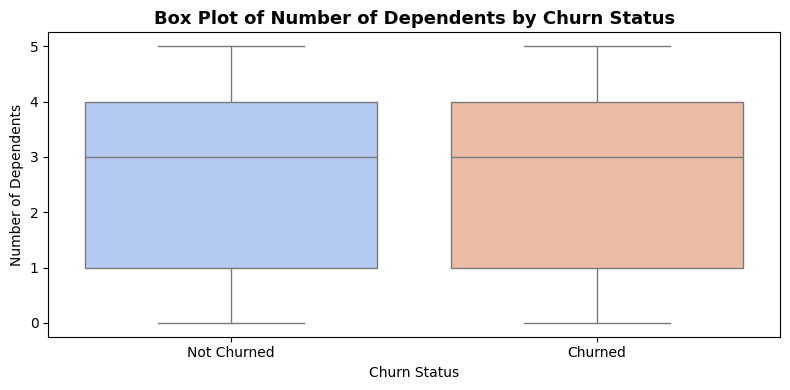

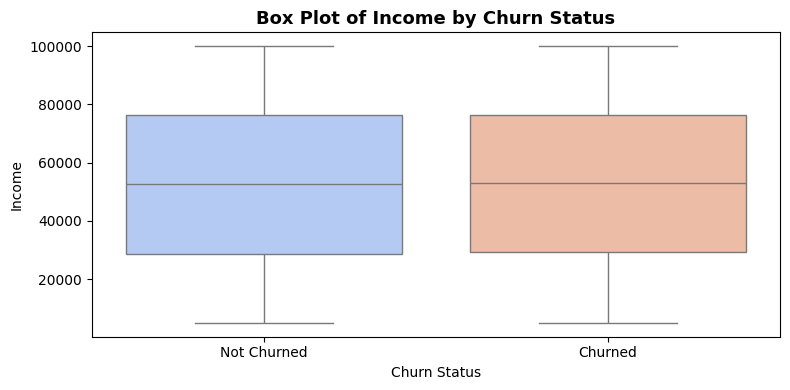

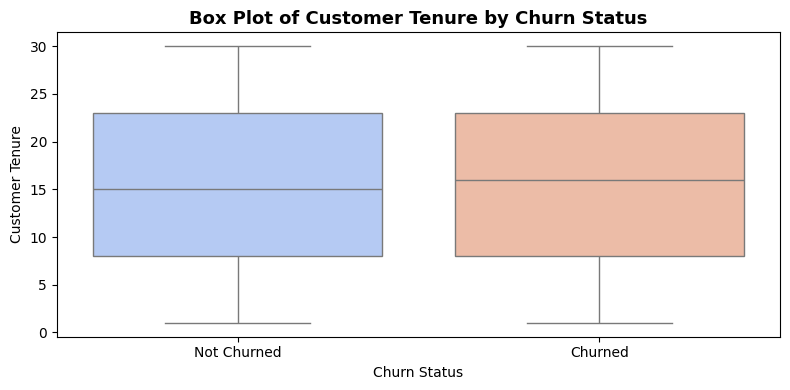

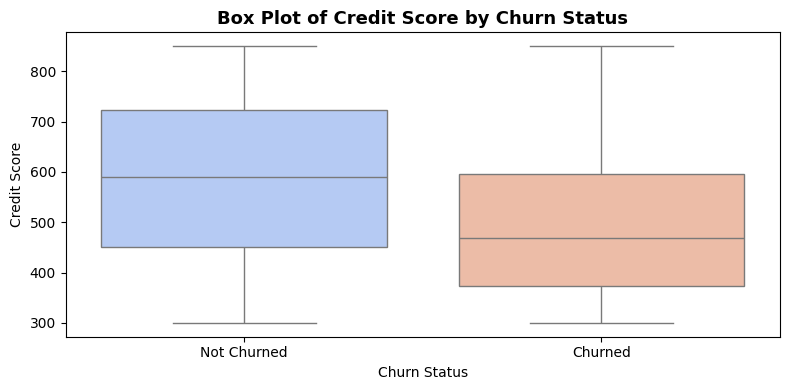

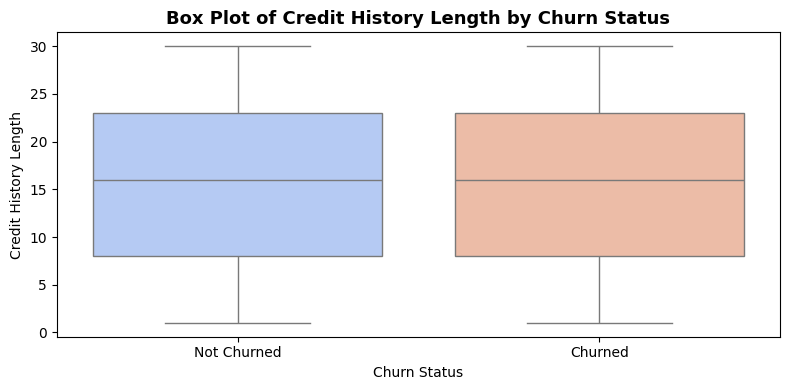

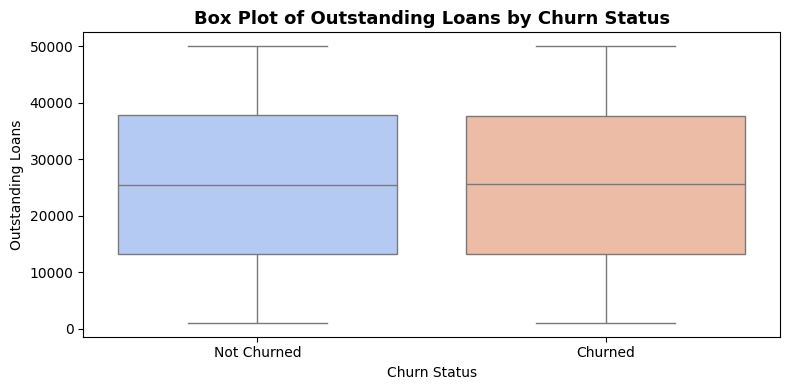

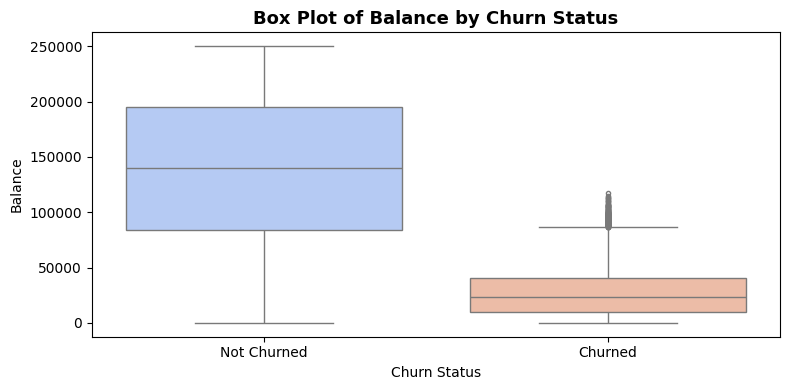

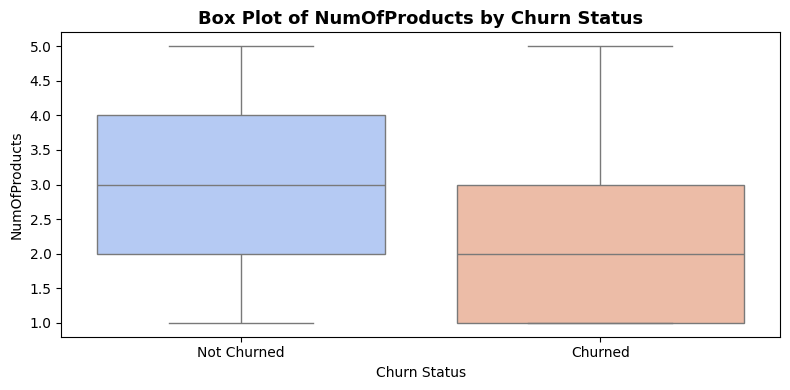

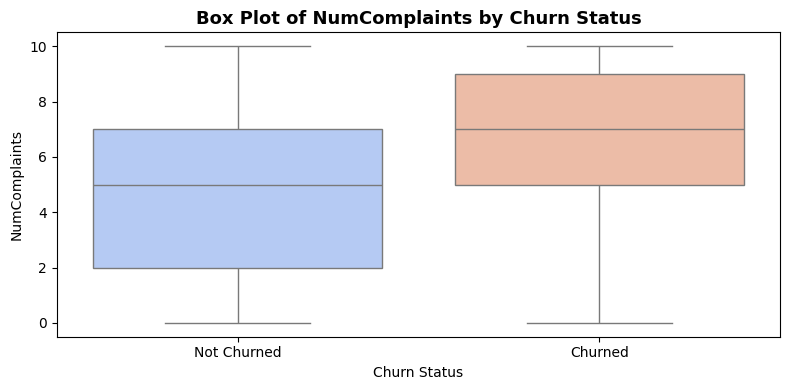

In [ ]:
# Select numeric features (excluding the target)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn Flag')
print("Numeric features:", list(numeric_features))

# Loop through each numeric feature and plot boxplots
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    
    sns.boxplot(
        x='Churn Flag',
        y=col,
        data=df,
        palette='coolwarm',
        linewidth=1,
        fliersize=3 
    )
    
    plt.title(f'Box Plot of {col} by Churn Status', fontsize=13, fontweight='bold')
    plt.xlabel('Churn Status')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Not Churned', 'Churned'])
    plt.tight_layout()
    plt.show()

# Pre-Pocessing

In [ ]:
df['Marital Status'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [ ]:
# 1️⃣ Label Encoding untuk kolom biner (2 kategori)
label_cols = ['Gender', 'Preferred Communication Channel']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# 2️⃣ One-Hot Encoding untuk kolom nominal (lebih dari 2 kategori)
nominal_cols = ['Marital Status', 'Customer Segment', 'Occupation_Group']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# 3️⃣ Encoding manual untuk kolom ordinal
education_order = {
    'High School': 1,
    'Diploma': 2,
    "Bachelor's": 3,
    "Master's": 4
}
df['Education Level'] = df['Education Level'].map(education_order)

# ✅ Cek hasil
print(df.head())

   Gender  Number of Dependents    Income  Education Level  Customer Tenure  \
0       1                     3  77710.14                1               30   
1       0                     1  58209.87                1               27   
2       0                     1   9794.01                1               14   
3       0                     5  15088.98                1               23   
4       0                     2  60726.56                4               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                1           397                     24   
1                                0           665                     10   
2                                0           715                     21   
3                                1           747                     17   
4                                0           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints 

In [ ]:
df.dtypes

Gender                                              int64
Number of Dependents                                int64
Income                                            float64
Education Level                                     int64
Customer Tenure                                     int64
Preferred Communication Channel                     int64
Credit Score                                        int64
Credit History Length                               int64
Outstanding Loans                                 float64
Churn Flag                                          int64
Balance                                           float64
NumOfProducts                                       int64
NumComplaints                                       int64
Marital Status_Married                               bool
Marital Status_Single                                bool
Customer Segment_Retail                              bool
Customer Segment_SME                                 bool
Occupation_Gro

In [ ]:
df = df.copy()

# Convert boolean columns (True/False) to float (1.0 / 0.0)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(float)

In [ ]:
# 2️⃣ Cek hasil akhir
print("✅ Conversion done. Data type summary:")
print(df.dtypes.value_counts())
print("\nTotal columns:", df.shape[1])

✅ Conversion done. Data type summary:
float64    24
int64      10
Name: count, dtype: int64

Total columns: 34


# Modeling

In [ ]:

#X_train = X_train_temp.copy()  # Menyalin kembali data asli
#y_train = y_train_temp.copy()  # Menyalin kembali label asli



In [ ]:
# 1️⃣ Pisahkan fitur dan target
X = df.drop('Churn Flag', axis=1)
y = df['Churn Flag']

# 2️⃣ Split dulu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Hanya scaling kolom numerik
numeric_columns = ['Income', 'Customer Tenure', 'Credit Score',
                   'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

print("Scaling applied to numeric columns only.")


Scaling applied to numeric columns only.


## TabNet

In [ ]:
# =========================================================
# 1️⃣ TRAINING MODEL
# =========================================================

tabnet = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',
    verbose=10,
    seed=42,
)

# Tambahkan 'roc_auc' ke eval_metric
tabnet.fit(
    X_train=X_train.values,        # data hasil scaling kamu
    y_train=y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_name=["test"],
    eval_metric=["accuracy", "auc"],
    max_epochs=100,
    patience=15,
    batch_size=2048,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


# =========================================================
# 2️⃣ EVALUATION
# =========================================================

# Predict probabilities (instead of just labels)
y_pred_proba = tabnet.predict_proba(X_test.values)[:, 1] 

y_pred = (y_pred_proba >= 0.5).astype(int) 

# Metrics
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) 
print(f"\n✅ Model Accuracy: {acc:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}") 

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


epoch 0  | loss: 0.258   | test_accuracy: 0.9632  | test_auc: 0.98862 |  0:00:04s
epoch 10 | loss: 0.02393 | test_accuracy: 0.98335 | test_auc: 0.99985 |  0:02:46s
epoch 20 | loss: 0.01483 | test_accuracy: 0.99671 | test_auc: 0.99993 |  0:04:14s
epoch 30 | loss: 0.01552 | test_accuracy: 0.9971  | test_auc: 0.99998 |  0:06:42s

Early stopping occurred at epoch 36 with best_epoch = 21 and best_test_auc = 0.99998

✅ Model Accuracy: 0.9957
✅ ROC AUC: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9951    1.0000    0.9976     20309
           1     1.0000    0.9649    0.9821      2819

    accuracy                         0.9957     23128
   macro avg     0.9976    0.9824    0.9898     23128
weighted avg     0.9957    0.9957    0.9957     23128

🧾 Confusion Matrix:
[[20309     0]
 [   99  2720]]



# SHAP

PermutationExplainer explainer: 501it [05:37,  1.48it/s]                         


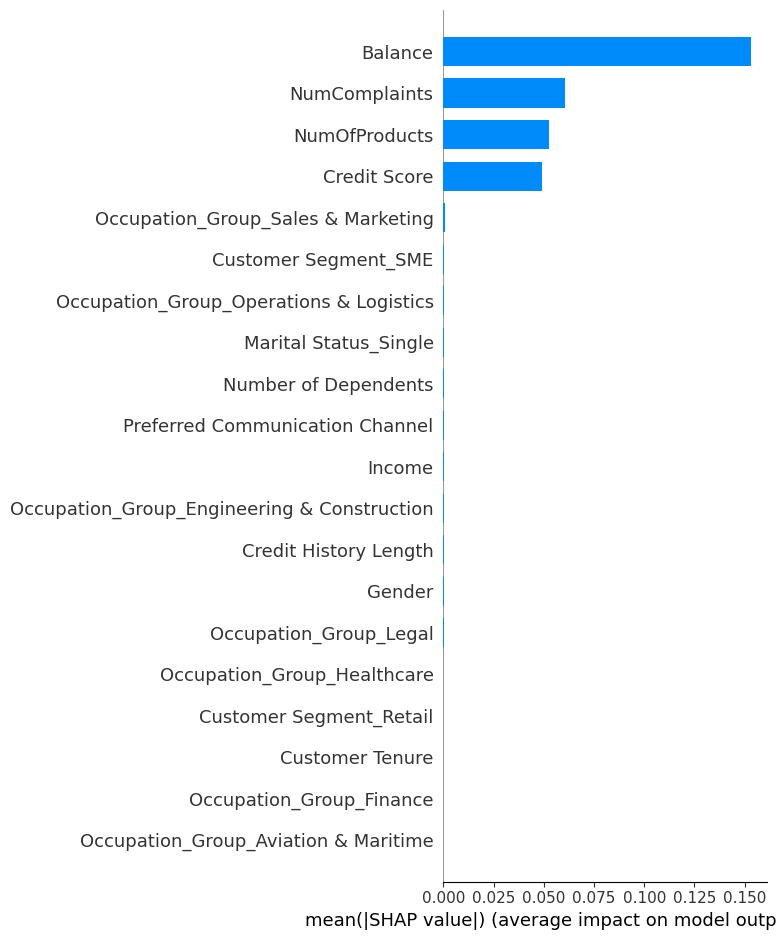

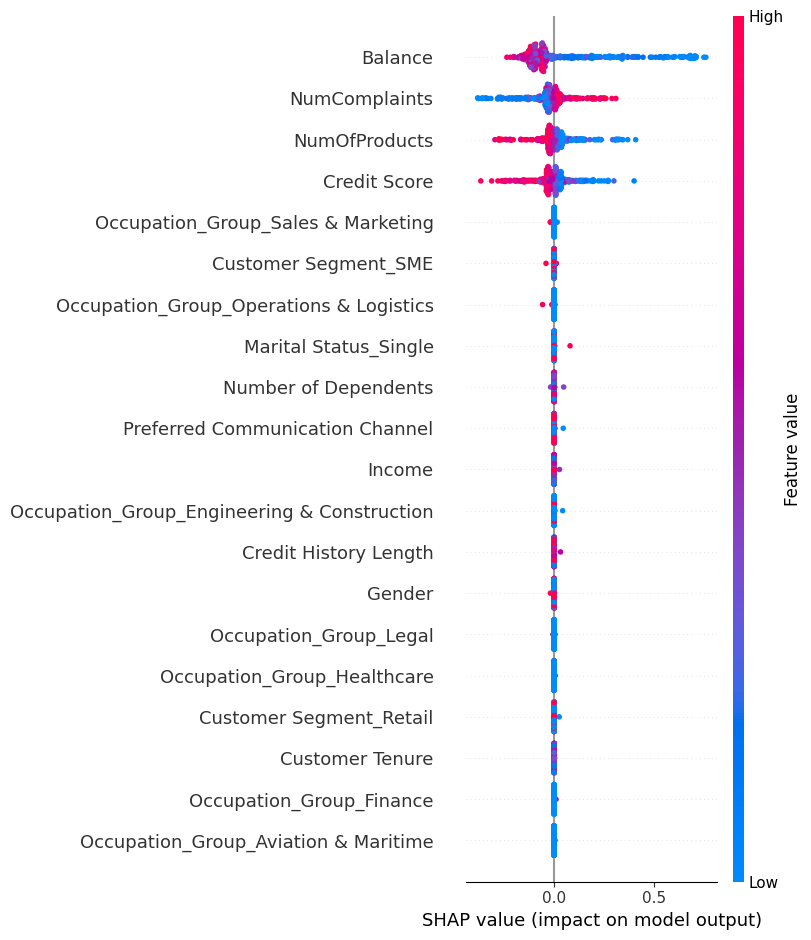

In [ ]:
# =========================================================
# 🔹 SHAP INTERPRETATION FOR TABNET
# =========================================================

X_train_np = X_train.values
X_test_np = X_test.values

def tabnet_predict(x):
    return tabnet.predict(x.astype(np.float32))

# 3️⃣ Create SHAP explainer
explainer = shap.Explainer(tabnet_predict, X_train_np)

# 4️⃣ Take a sample from test data
X_sample = X_test.sample(500, random_state=42)
X_sample_np = X_sample.values.astype(np.float32)

# 5️⃣ Compute SHAP values safely
shap_values = explainer(X_sample_np)

# 6️⃣ Plot summary (global importance)
shap.summary_plot(shap_values.values, X_sample, plot_type="bar", show=True)

# 7️⃣ Beeswarm plot (distribution of SHAP values)
shap.summary_plot(shap_values.values, X_sample, show=True)

## SHAP Large Sample

PermutationExplainer explainer: 1501it [08:56,  2.76it/s]                          


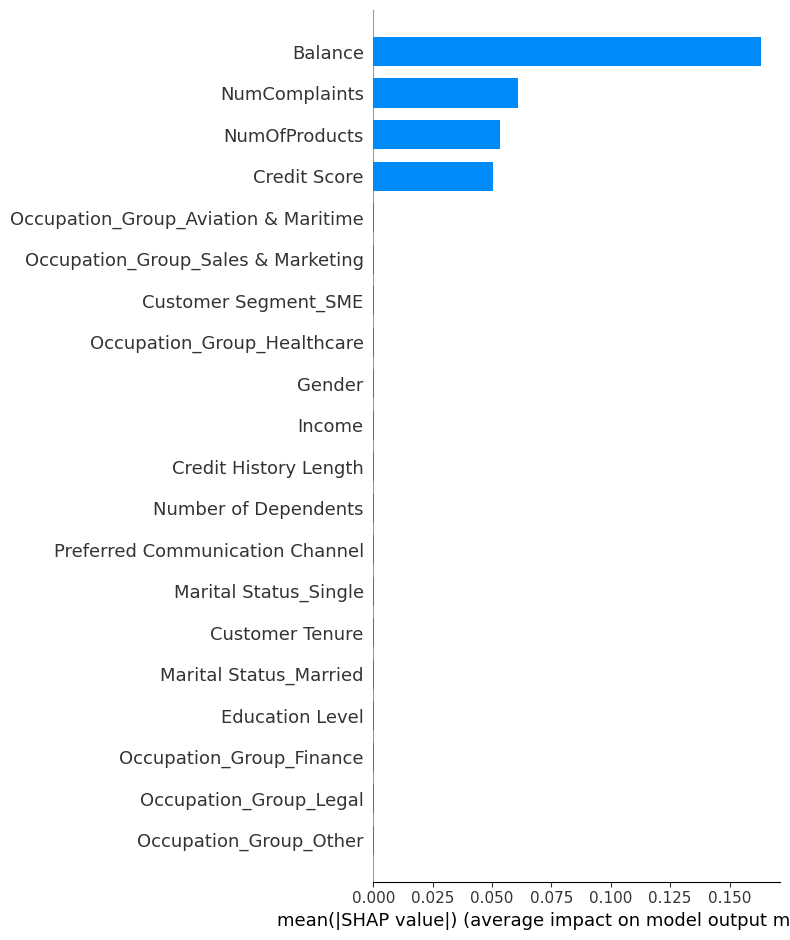

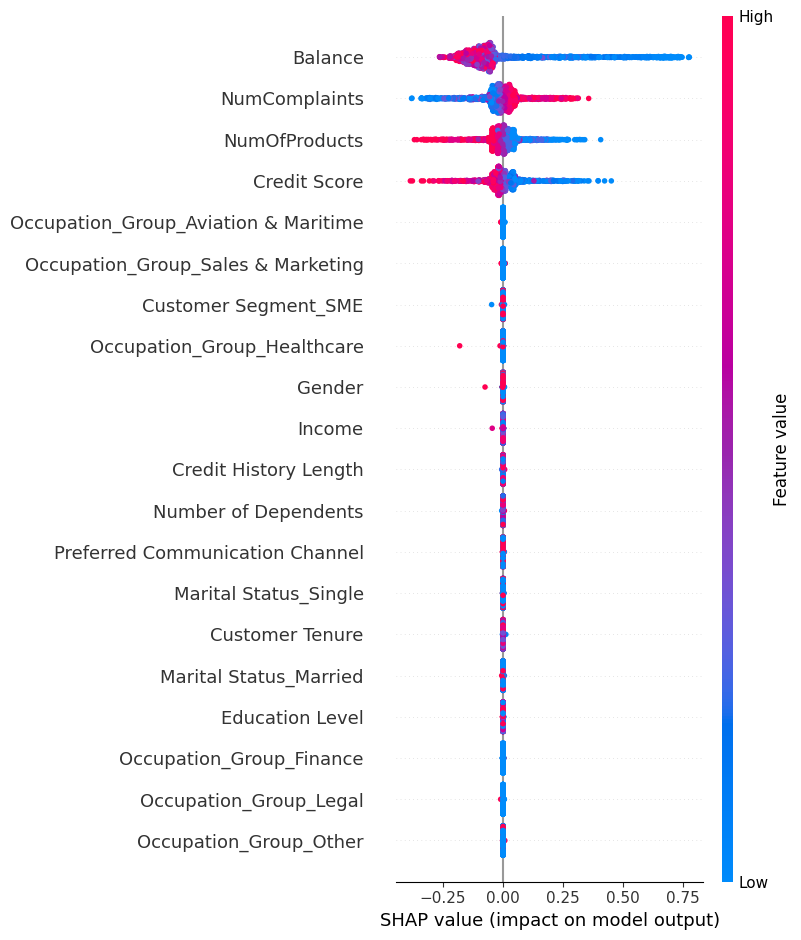

In [ ]:
# ===========================
# SHAP with larger sample (stratified) for TabNet
# ===========================

X_train_np = X_train.values.astype(np.float32)
X_test_np  = X_test.values.astype(np.float32)

def tabnet_predict(x: np.ndarray):
    
    return tabnet.predict(x.astype(np.float32))


SAMPLE_N = 1500 
# compute per-class quotas
dist = y_test.value_counts(normalize=True)
n_pos = int(round(SAMPLE_N * dist.get(1, 0)))
n_neg = SAMPLE_N - n_pos

pos_idx = y_test[y_test == 1].sample(n=min(n_pos, (y_test==1).sum()), random_state=42).index
neg_idx = y_test[y_test == 0].sample(n=min(n_neg, (y_test==0).sum()), random_state=42).index
sample_idx = pos_idx.union(neg_idx)

X_sample = X_test.loc[sample_idx]
X_sample_np = X_sample.values.astype(np.float32)

# 3) Use a small background set to speed-up Explainer
BACKGROUND_N = 200
X_bg = X_train.sample(BACKGROUND_N, random_state=42).values.astype(np.float32)

explainer = shap.Explainer(tabnet_predict, X_bg)

# 4) Compute SHAP values
shap_values = explainer(X_sample_np)  # returns Explanation object

# 5) Plots
# Global importance (bar)
shap.summary_plot(shap_values.values, X_sample, plot_type="bar", show=True)

# Beeswarm (distribution and direction)
shap.summary_plot(shap_values.values, X_sample, show=True)

# Model Pembanding

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

# Model MLPClassifier
mlp_low = MLPClassifier(
    hidden_layer_sizes=(32,),   
    activation="relu",
    alpha=1e-2,                 
    learning_rate_init=1e-3,
    max_iter=200,
    early_stopping=True,
    random_state=59
)

# Latih model
mlp_low.fit(X_train, y_tr)

# Prediksi label dan probabilitas
pred = mlp_low.predict(X_test)
pred_proba = mlp_low.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# Evaluasi
acc = accuracy_score(y_te, pred)
roc_auc = roc_auc_score(y_te, pred_proba)  

# Tampilkan hasil
print(f"[MLPClassifier] Accuracy: {acc:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")  # Print ROC AUC

print("📊 Classification Report:")
print(classification_report(y_te, pred, digits=4))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_te, pred))


[MLPClassifier] Accuracy: 0.9979
✅ ROC AUC: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9984    0.9988     20309
           1     0.9884    0.9947    0.9915      2819

    accuracy                         0.9979     23128
   macro avg     0.9938    0.9965    0.9952     23128
weighted avg     0.9979    0.9979    0.9979     23128

🧾 Confusion Matrix:
[[20276    33]
 [   15  2804]]


In [ ]:
import joblib

# Menyimpan model MLPClassifier setelah pelatihan
joblib.dump(mlp_low, 'MLP.pkl')
print("Model berhasil disimpan!")

Model berhasil disimpan!


## Simple RNN

In [ ]:
pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/331.8 MB 2.6 MB/s eta 0:02:06
   ---------------------------------------- 0.2/331.8 MB 3.0 MB/s eta 0:01:50
   ---------------------------------------- 0.4/331.8 MB 3.1 MB/s eta 0:01:49
   ---------------------------------------- 0.5/331.8 MB 3.3 MB/s eta 0:01:39
   ---------------------------------------- 0.7/331.8 MB 3.5 MB/s eta 0:01:36
   ---------------------------------------- 1.0/331.8 MB 3.8 MB/s eta 0:01:27
   ---------------------------------------- 1.2/331.8 MB 3.9 MB/s eta 0:01:26
   ---------------------------------------- 1.5/331.8 MB 4.1 MB/s eta 0:01:21
   ---------------------------------------- 1.8/331.8 MB 4.3 MB/s eta 0:01:17
   ---------------------------------------- 2.0/331.8 MB 4.4 MB/s eta 0:01:16
   ---------------------------------------- 2.3/331.8 MB 4.5 MB/s eta 0:01:13



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# reshape: (samples, timesteps=features, channels=1)
Xtr_seq = np.expand_dims(X_train, -1)
Xte_seq = np.expand_dims(X_test, -1)
y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

# Define SimpleRNN model
rnn = models.Sequential([
    layers.Input(shape=(Xtr_seq.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping callback
es = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

# Train the model
rnn.fit(Xtr_seq, y_tr, validation_data=(Xte_seq, y_te),
        epochs=150, batch_size=256, callbacks=[es], verbose=0)

# Predict probabilities (instead of just labels)
p2 = rnn.predict(Xte_seq).ravel() 

# Predicted labels based on threshold of 0.5
yhat2 = (p2 >= 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_te, yhat2)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_te, p2)

# Print results
print(f"[SimpleRNN] Accuracy: {acc:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")  # Print ROC AUC

# Classification report
print("📊 Classification Report:")
print(classification_report(y_te, yhat2, digits=4))

# Confusion matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_te, yhat2))


723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[SimpleRNN] Accuracy: 0.9936
✅ ROC AUC: 0.9997
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9946    0.9981    0.9963     20309
           1     0.9862    0.9606    0.9732      2819

    accuracy                         0.9936     23128
   macro avg     0.9904    0.9794    0.9848     23128
weighted avg     0.9935    0.9936    0.9935     23128

🧾 Confusion Matrix:
[[20271    38]
 [  111  2708]]


## CNN 1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X_train_cnn = np.expand_dims(X_train.values.astype(np.float32), -1)
X_test_cnn = np.expand_dims(X_test.values.astype(np.float32), -1)
y_tr = y_train.values.ravel()
y_te = y_test.values.ravel()

cnn_baseline = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn_baseline.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

es = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

# Train the model
history_cnn = cnn_baseline.fit(
    X_train_cnn, y_tr,
    validation_data=(X_test_cnn, y_te),
    epochs=80,
    batch_size=256,
    callbacks=[es],
    verbose=0
)

# ============================
# 2️⃣ EVALUATION: Calculate Accuracy & AUC
# ============================

# Predict probabilities (instead of just labels)
y_pred_prob = cnn_baseline.predict(X_test_cnn).ravel()  

y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate Accuracy
acc_cnn = accuracy_score(y_te, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_te, y_pred_prob)  # Calculating ROC AUC

# Print results
print(f"[CNN 1D Baseline] Accuracy: {acc_cnn:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")  # Print ROC AUC

# Classification report
print("📊 Classification Report:")
print(classification_report(y_te, y_pred, digits=4))

# Confusion matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_te, y_pred))


723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step
[CNN 1D Baseline] Accuracy: 0.9616
✅ ROC AUC: 0.9868
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9722    0.9844    0.9783     20309
           1     0.8768    0.7974    0.8352      2819

    accuracy                         0.9616     23128
   macro avg     0.9245    0.8909    0.9068     23128
weighted avg     0.9606    0.9616    0.9609     23128

🧾 Confusion Matrix:
[[19993   316]
 [  571  2248]]


## DNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

tf.keras.utils.set_random_seed(59)

X_train_np = (X_train.values if hasattr(X_train, "values") else X_train).astype(np.float32)
X_test_np  = (X_test.values  if hasattr(X_test,  "values")  else X_test ).astype(np.float32)
y_train_np = np.asarray(y_train).ravel().astype(int)
y_test_np  = np.asarray(y_test).ravel().astype(int)

reg = regularizers.l2(1e-3)
dnn = models.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(32, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

dnn.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
            loss='binary_crossentropy', metrics=['accuracy'])

cbs = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, min_lr=1e-5, verbose=1)
]

# Train the model
history_dnn = dnn.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=100, batch_size=256, callbacks=cbs, verbose=0
)

# ============================
# 3️⃣ EVALUATION: Calculate Accuracy & AUC
# ============================

proba = dnn.predict(X_test_np, verbose=0).ravel()  # Getting probability for class 1 (positive class)

# Predicted labels based on threshold of 0.5
y_pred = (proba >= 0.5).astype(int)

# Calculate Accuracy
acc_dnn = accuracy_score(y_test_np, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_np, proba)  # Calculating ROC AUC

# Print results
print(f"[DNN Baseline] Accuracy: {acc_dnn:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")  # Print ROC AUC

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test_np, y_pred, digits=4))

# Confusion matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 44: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 53: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
[DNN Baseline] Accuracy: 0.9995
✅ ROC AUC: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9995    0.9997     20309
           1     0.9965    0.9993    0.9979      2819

    accuracy                         0.9995     23128
   macro avg     0.9982    0.9994    0.9988     23128
weighted avg     0.9995    0.9995    0.9995     23128

🧾 Confusion Matrix:
[[20299    10]
 [    2  2817]]


## Resnet 1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# ============================
# 1. Reshape tabular 
# ============================
Xtr = np.expand_dims(X_train, axis=-1)  
Xte = np.expand_dims(X_test, axis=-1)

y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

# ============================
# 2. Residual Block Function
# ============================
def res_block(x, filters=32, kernel_size=3):
    shortcut = x

    # Conv 1
    y = layers.Conv1D(filters, kernel_size, padding="same", activation="relu")(x)
    y = layers.BatchNormalization()(y)

    # Conv 2
    y = layers.Conv1D(filters, kernel_size, padding="same", activation=None)(y)
    y = layers.BatchNormalization()(y)

    # Match dimensions if needed
    if x.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, padding="same")(x)

    # Residual add
    out = layers.Add()([shortcut, y])
    out = layers.Activation("relu")(out)
    return out

# ============================
# 3. Build 1D ResNet Model
# ============================
inp = layers.Input(shape=(Xtr.shape[1], 1))

x = res_block(inp, filters=32)
x = layers.MaxPooling1D(pool_size=2)(x)

x = res_block(x, filters=32)
x = layers.MaxPooling1D(pool_size=2)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)

out = layers.Dense(1, activation="sigmoid")(x)

resnet1d = models.Model(inputs=inp, outputs=out)

resnet1d.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

resnet1d.summary()

# ============================
# 4. Train
# ============================
es = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history = resnet1d.fit(
    Xtr, y_tr,
    validation_data=(Xte, y_te),
    epochs=100,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

# ============================
# 5. Evaluate
# ============================
# Predict probabilities (instead of just labels)
pred_prob = resnet1d.predict(Xte).ravel() 

# Predicted labels based on threshold of 0.5
pred = (pred_prob >= 0.5).astype(int)

# Calculate Accuracy
acc_resnet = accuracy_score(y_te, pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_te, pred_prob) 

# Print results
print(f"[1D-ResNet] Accuracy: {acc_resnet:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")  # Print ROC AUC

# Classification report
print("📊 Classification Report:")
print(classification_report(y_te, pred, digits=4))

# Confusion matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_te, pred))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 33, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 33, 32)    │        128 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 32)    │        128 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 33, 32)    │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 33, 32)    │         64 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 32)    │        128 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 33, 32)    │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 33, 32)    │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 16, 32)    │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 16, 32)    │      3,104 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 32)    │        128 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 16, 32)    │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 32)    │        128 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 32)    │          0 │ max_pooling1d[0]… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 32)    │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 8, 32)     │          0 │ activation_1[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ max_pooling1d_1[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dropout_5[0][0] 

 Total params: 10,049 (39.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9451 - loss: 0.1437 - val_accuracy: 0.8800 - val_loss: 0.4867
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9767 - loss: 0.0607 - val_accuracy: 0.9552 - val_loss: 0.1009
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9814 - loss: 0.0473 - val_accuracy: 0.9916 - val_loss: 0.0262
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9840 - loss: 0.0410 - val_accuracy: 0.9923 - val_loss: 0.0232
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9841 - loss: 0.0395 - val_accuracy: 0.9908 - val_loss: 0.0233
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9861 - loss: 0.0348 - val_accuracy: 0.9930 - val_loss: 0.0191
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9871 - loss: 0.0329 - val_accuracy: 0.9901 - val_loss: 0.0236
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9874 - loss: 0.0308 - val_

# McNemar Test

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar


In [ ]:
import numpy as np

# Ground truth sebagai numpy 1D
y_true = np.asarray(y_test).ravel().astype(int)

# 1) TabNet
y_tabnet = tabnet.predict(X_test.values)        
y_tabnet = np.asarray(y_tabnet).ravel().astype(int)

# 2) MLP (sklearn)
y_mlp = mlp_low.predict(X_test)
y_mlp = np.asarray(y_mlp).ravel().astype(int)

# 3) SimpleRNN 
p_rnn = rnn.predict(Xte_seq).ravel()
y_rnn = (p_rnn >= 0.5).astype(int)

# 4) CNN 1D 
p_cnn = cnn_baseline.predict(X_test_cnn).ravel()
y_cnn = (p_cnn >= 0.5).astype(int)

# 5) DNN
p_dnn = dnn.predict(X_test_np, verbose=0).ravel()
y_dnn = (p_dnn >= 0.5).astype(int)

# 6) ResNet1D 
p_res = resnet1d.predict(Xte).ravel()
y_res = (p_res >= 0.5).astype(int)


In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_from_preds(y_true, y1, y2, name1="Model 1", name2="Model 2"):
    """
    y_true : array 0/1 ground truth
    y1     : prediksi biner model 1
    y2     : prediksi biner model 2
    """

    y_true = np.asarray(y_true).ravel()
    y1 = np.asarray(y1).ravel()
    y2 = np.asarray(y2).ravel()

    assert len(y_true) == len(y1) == len(y2), "Panjang array harus sama"

    # Benar / salah dibanding y_true
    c1 = (y1 == y_true)
    c2 = (y2 == y_true)

    n11 = np.sum(c1 & c2)        
    n10 = np.sum(c1 & ~c2)       
    n01 = np.sum(~c1 & c2)       
    n00 = np.sum(~c1 & ~c2)      

    table = np.array([[n11, n10],
                      [n01, n00]])

    print(f"\n===== McNemar: {name1} vs {name2} =====")
    print("Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)")
    print(table)

    result = mcnemar(table, exact=False, correction=True)
    print(f"Statistic : {result.statistic:.4f}")
    print(f"p-value   : {result.pvalue:.12e}")
    

    if result.pvalue < 0.05:
        print(f"🚨 Perbedaan {name1} dan {name2} **SIGNIFIKAN** (tolak H0)")
    else:
        print(f"✅ Tidak ada perbedaan signifikan antara {name1} dan {name2} (gagal tolak H0)")


In [ ]:
# 1. TabNet vs MLP
mcnemar_from_preds(y_true, y_tabnet, y_mlp, "TabNet", "MLP")

# 2. TabNet vs SimpleRNN
mcnemar_from_preds(y_true, y_tabnet, y_rnn, "TabNet", "SimpleRNN")

# 3. TabNet vs CNN 1D
mcnemar_from_preds(y_true, y_tabnet, y_cnn, "TabNet", "CNN 1D")

# 4. TabNet vs DNN
mcnemar_from_preds(y_true, y_tabnet, y_dnn, "TabNet", "DNN")

# 5. TabNet vs ResNet1D
mcnemar_from_preds(y_true, y_tabnet, y_res, "TabNet", "ResNet1D")


# Balancing menggunakan SMOTE-Tomek

In [ ]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/235.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.4 kB 960.0 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/235.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 235.4/235.4 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

# ============================
# Step 1: Simpan data asli ke variabel sementara
# ============================
X_train_temp = X_train.copy()  
y_train_temp = y_train.copy()  


smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
tomek = TomekLinks(sampling_strategy='auto')

# Buat pipeline untuk SMOTE + Tomek
pipeline = Pipeline([('smote', smote), ('tomek', tomek)])

# Apply SMOTE + Tomek ke data
X_res, y_res = pipeline.fit_resample(X_train_temp, y_train_temp)

X_train_temp_resampled = X_res.copy() 
y_train_temp_resampled = y_res.copy()


In [ ]:

X_train = X_train_temp_resampled  # Gunakan data yang sudah di-resample
y_train = y_train_temp_resampled  # Gunakan label hasil SMOTE



In [ ]:

import pandas as pd

y_res_series = pd.Series(y_res)

print("Distribusi Kelas Setelah SMOTE:")
print(y_res_series.value_counts())

from collections import Counter
print("\nDistribusi Kelas dengan Counter:")
print(Counter(y_res))

Distribusi Kelas Setelah SMOTE:
Churn Flag
0    81237
1    81225
Name: count, dtype: int64

Distribusi Kelas dengan Counter:
Counter({0: 81237, 1: 81225})


# TabNet

In [ ]:
# =========================================================
# 1️⃣ TRAINING MODEL
# =========================================================

tabnet = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',  
    verbose=10,
    seed=42
)

tabnet.fit(
    X_train=X_train.values,     
    y_train=y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=15,
    batch_size=2048,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


# =========================================================
# 2️⃣ EVALUATION
# =========================================================

# Predict probabilities (instead of just labels)
y_pred_proba = tabnet.predict_proba(X_test.values)[:, 1] 

# Prediksi kelas berdasarkan threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int) 


acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) 
print(f"\n✅ Model Accuracy: {acc:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}") 

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


epoch 0  | loss: 0.19539 | test_accuracy: 0.89999 |  0:00:07s
epoch 10 | loss: 0.01763 | test_accuracy: 0.99723 |  0:01:16s
epoch 20 | loss: 0.01561 | test_accuracy: 0.99503 |  0:02:28s
epoch 30 | loss: 0.01722 | test_accuracy: 0.99706 |  0:04:31s

Early stopping occurred at epoch 38 with best_epoch = 23 and best_test_accuracy = 0.99792

✅ Model Accuracy: 0.9979
✅ ROC AUC: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9989    0.9988     20309
           1     0.9922    0.9908    0.9915      2819

    accuracy                         0.9979     23128
   macro avg     0.9955    0.9948    0.9951     23128
weighted avg     0.9979    0.9979    0.9979     23128

🧾 Confusion Matrix:
[[20287    22]
 [   26  2793]]


# SHAP

PermutationExplainer explainer: 501it [04:04,  1.97it/s]                         


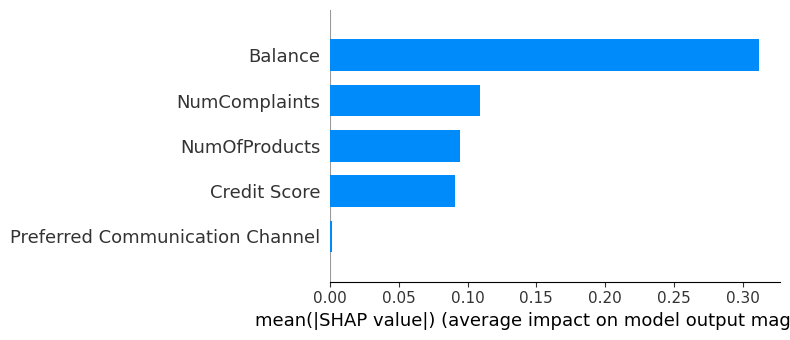

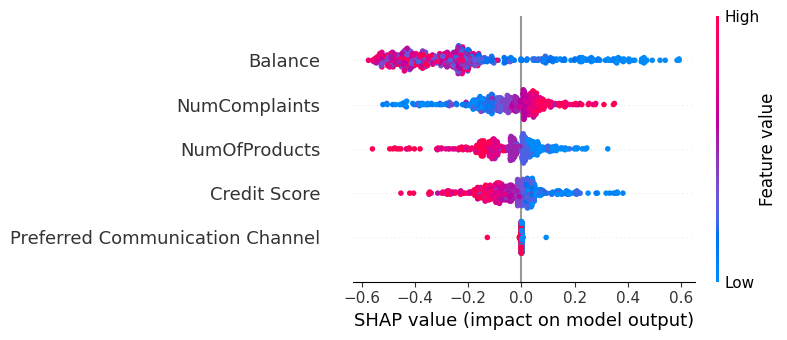

In [ ]:
# =========================================================
# 🔹 SHAP INTERPRETATION FOR TABNET
# =========================================================

X_train_np = X_train.values
X_test_np = X_test.values

def tabnet_predict(x):
    return tabnet.predict(x.astype(np.float32))

# 3️⃣ Create SHAP explainer
explainer = shap.Explainer(tabnet_predict, X_train_np)

# 4️⃣ Take a sample from test data
X_sample = X_test.sample(500, random_state=42)
X_sample_np = X_sample.values.astype(np.float32)

# 5️⃣ Compute SHAP values safely
shap_values = explainer(X_sample_np)

# 6️⃣ Plot summary (global importance)
shap.summary_plot(shap_values.values, X_sample, plot_type="bar",max_display=5, show=True)

# 7️⃣ Beeswarm plot (distribution of SHAP values)
shap.summary_plot(shap_values.values, X_sample, max_display=5,show=True)

# Model Pembanding

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

mlp_low = MLPClassifier(
    hidden_layer_sizes=(32,),  
    activation="relu",
    alpha=1e-2,                 
    learning_rate_init=1e-3,
    max_iter=200,
    early_stopping=True,
    random_state=59
)
mlp_low.fit(X_train, y_tr)

pred = mlp_low.predict(X_test)
print(f"[MLPClassifier] Acc: {accuracy_score(y_te, pred):.4f}")
print(classification_report(y_te, pred, digits=4))
print(confusion_matrix(y_te, pred))

[MLPClassifier] Acc: 0.9975
              precision    recall  f1-score   support

           0     0.9992    0.9980    0.9986     20309
           1     0.9856    0.9940    0.9898      2819

    accuracy                         0.9975     23128
   macro avg     0.9924    0.9960    0.9942     23128
weighted avg     0.9975    0.9975    0.9975     23128

[[20268    41]
 [   17  2802]]


## Simple RNN

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# reshape: (samples, timesteps=features, channels=1)
Xtr_seq = np.expand_dims(X_train, -1)
Xte_seq = np.expand_dims(X_test, -1)
y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

rnn = models.Sequential([
    layers.Input(shape=(Xtr_seq.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

es = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
rnn.fit(Xtr_seq, y_tr, validation_data=(Xte_seq, y_te),
        epochs=150, batch_size=256, callbacks=[es], verbose=0)

p2 = rnn.predict(Xte_seq).ravel()
yhat2 = (p2 >= 0.5).astype(int)
print(f"[SimpleRNN] Acc: {accuracy_score(y_te, yhat2):.4f}")
print(classification_report(y_te, yhat2, digits=4))
print(confusion_matrix(y_te, yhat2))

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[SimpleRNN] Acc: 0.9959
              precision    recall  f1-score   support

           0     0.9984    0.9969    0.9977     20309
           1     0.9782    0.9886    0.9834      2819

    accuracy                         0.9959     23128
   macro avg     0.9883    0.9928    0.9905     23128
weighted avg     0.9960    0.9959    0.9959     23128

[[20247    62]
 [   32  2787]]


## CNN 1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Reshape data (samples, timesteps=features, channels=1)
X_train_cnn = np.expand_dims(X_train.values.astype(np.float32), -1)
X_test_cnn = np.expand_dims(X_test.values.astype(np.float32), -1)
y_tr = y_train.values.ravel()
y_te = y_test.values.ravel()

# === CNN baseline (ringan dan fair) ===
cnn_baseline = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn_baseline.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

es = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

history_cnn = cnn_baseline.fit(
    X_train_cnn, y_tr,
    validation_data=(X_test_cnn, y_te),
    epochs=80,
    batch_size=256,
    callbacks=[es],
    verbose=0
)

# Evaluate
y_pred_prob = cnn_baseline.predict(X_test_cnn).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc_cnn = accuracy_score(y_te, y_pred)
print(f"[CNN 1D Baseline] Accuracy: {acc_cnn:.4f}")
print(classification_report(y_te, y_pred, digits=4))
print(confusion_matrix(y_te, y_pred))

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step
[CNN 1D Baseline] Accuracy: 0.9356
              precision    recall  f1-score   support

           0     0.9774    0.9486    0.9628     20309
           1     0.6945    0.8418    0.7611      2819

    accuracy                         0.9356     23128
   macro avg     0.8359    0.8952    0.8619     23128
weighted avg     0.9429    0.9356    0.9382     23128

[[19265  1044]
 [  446  2373]]


## DNN

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

# Reproducibility
tf.keras.utils.set_random_seed(59)

# ---------- 0) Encode y if needed ----------
if not np.issubdtype(pd.Series(y_train).dtype, np.number):
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc  = le.transform(y_test)
else:
    y_train_enc = np.asarray(y_train)
    y_test_enc  = np.asarray(y_test)

num_classes = len(np.unique(y_train_enc))
is_binary = (num_classes == 2)

X_train_proc, X_test_proc = X_train.copy(), X_test.copy()
if isinstance(X_train_proc, pd.DataFrame) and any(X_train_proc.dtypes == "object"):
    X_train_proc = pd.get_dummies(X_train_proc, drop_first=False)
    X_test_proc  = pd.get_dummies(X_test_proc,  drop_first=False)
    X_train_proc, X_test_proc = X_train_proc.align(X_test_proc, join="left", axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_proc)
X_test_scaled  = scaler.transform(X_test_proc)

X_train_np = X_train_scaled.astype(np.float32)
X_test_np  = X_test_scaled.astype(np.float32)

class_weights = None
if is_binary:
    classes = np.unique(y_train_enc)
    cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
    class_weights = {int(c): float(w) for c, w in zip(classes, cw)}

def build_dnn_baseline(input_dim, is_binary, num_classes):
    reg = regularizers.l2(1e-3)  

    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu', kernel_regularizer=reg)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(64, activation='relu', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    if is_binary:
        outputs = layers.Dense(1, activation='sigmoid')(x)
        loss = 'binary_crossentropy'
        metrics = ['accuracy']
    else:
        outputs = layers.Dense(num_classes, activation='softmax')(x)
        loss = 'sparse_categorical_crossentropy'
        metrics = ['accuracy']

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=loss, metrics=metrics)
    return model

dnn = build_dnn_baseline(X_train_np.shape[1], is_binary, num_classes)

# ---------- 5) Callbacks ----------
cbs = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, min_lr=1e-5, verbose=1)
]

# ---------- 6) Train  ----------
history = dnn.fit(
    X_train_np,
    y_train_enc,
    validation_data=(X_test_np, y_test_enc),
    epochs=100,             
    batch_size=256,
    callbacks=cbs,
    class_weight=class_weights,
    verbose=1
)

# ---------- 7) Evaluate ----------
if is_binary:
    y_prob = dnn.predict(X_test_np, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)
else:
    y_prob = dnn.predict(X_test_np, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(y_test_enc, y_pred)
print(f"[DNN Baseline] Accuracy: {acc:.4f}")
print("\n[DNN Baseline] Classification Report:")
print(classification_report(y_test_enc, y_pred, digits=4))
print("\n[DNN Baseline] Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tf.keras.utils.set_random_seed(59)

X_train_np = (X_train.values if hasattr(X_train, "values") else X_train).astype(np.float32)
X_test_np  = (X_test.values  if hasattr(X_test,  "values")  else X_test ).astype(np.float32)
y_train_np = np.asarray(y_train).ravel().astype(int)
y_test_np  = np.asarray(y_test).ravel().astype(int)

reg = regularizers.l2(1e-3)
dnn = models.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(32, activation='relu', kernel_regularizer=reg),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])
dnn.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
            loss='binary_crossentropy', metrics=['accuracy'])

cbs = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, min_lr=1e-5, verbose=1)
]

history = dnn.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=100, batch_size=256, callbacks=cbs, verbose=0
)

# 3) Evaluasi
proba = dnn.predict(X_test_np, verbose=0).ravel()
y_pred = (proba >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"[DNN Baseline] Accuracy: {accuracy_score(y_test_np, y_pred):.4f}")
print(classification_report(y_test_np, y_pred, digits=4))
print(confusion_matrix(y_test_np, y_pred))


Epoch 1/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9380 - loss: 0.2810 - val_accuracy: 0.9812 - val_loss: 0.1270 - learning_rate: 0.0010
Epoch 2/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0959 - val_accuracy: 0.9905 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 3/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0584 - val_accuracy: 0.9918 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 4/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9910 - loss: 0.0437 - val_accuracy: 0.9910 - val_loss: 0.0356 - learning_rate: 0.0010
Epoch 5/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9913 - loss: 0.0376 - val_accuracy: 0.9933 - val_loss: 0.0278 - learning_rate: 0.0010
Epoch 6/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9920 - loss: 0.0337 - val_accuracy: 0.9934 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 7/100
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.

## Resnet 1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================
# 1. Reshape tabular → 1D format
# ============================
Xtr = np.expand_dims(X_train, -1)
Xte = np.expand_dims(X_test, -1)
y_tr = np.asarray(y_train).ravel()
y_te = np.asarray(y_test).ravel()

print("Shape X_train after expand:", Xtr.shape)

# ============================
# 2. Residual Block
# ============================
def res_block(x, filters=32, kernel_size=3):
    shortcut = x

    y = layers.Conv1D(filters, kernel_size, padding="same", activation="relu")(x)
    y = layers.BatchNormalization()(y)

    y = layers.Conv1D(filters, kernel_size, padding="same", activation=None)(y)
    y = layers.BatchNormalization()(y)

    # If channel mismatch → fix shortcut
    if x.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, padding="same")(x)

    out = layers.Add()([shortcut, y])
    out = layers.Activation("relu")(out)
    return out

# ============================
# 3. Build Model
# ============================
inp = layers.Input(shape=(Xtr.shape[1], 1))

x = res_block(inp, 32)
x = layers.MaxPooling1D(2)(x)

x = res_block(x, 32)
x = layers.MaxPooling1D(2)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(1, activation="sigmoid")(x)

resnet1d = models.Model(inp, out)

resnet1d.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("\n=== MODEL SUMMARY ===")
resnet1d.summary()

# ============================
# 4. Train Model
# ============================
print("\n=== TRAINING START ===")
es = callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = resnet1d.fit(
    Xtr, y_tr,
    validation_data=(Xte, y_te),
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

print("\n=== TRAINING DONE ===")

# ============================
# 5. Evaluate
# ============================
print("\n=== EVALUATION ===")
eval_loss, eval_acc = resnet1d.evaluate(Xte, y_te, verbose=1)
print(f"Test Loss: {eval_loss:.4f}")
print(f"Test Accuracy: {eval_acc:.4f}")

# ============================
# 6. Predictions
# ============================
pred_prob = resnet1d.predict(Xte).ravel()
pred_class = (pred_prob >= 0.5).astype(int)

print("\n=== CLASSIFICATION METRICS ===")
print("Accuracy :", accuracy_score(y_te, pred_class))
print("\nClassification Report:\n", classification_report(y_te, pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_te, pred_class))


Shape X_train after expand: (162462, 33, 1)

=== MODEL SUMMARY ===


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 33, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 33, 32)    │        128 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 32)    │        128 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 33, 32)    │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 33, 32)    │         64 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 32)    │        128 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 33, 32)    │          0 │ conv1d_14[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 32)    │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 16, 32)    │          0 │ activation_4[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 16, 32)    │      3,104 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 32)    │        128 │ conv1d_15[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 16, 32)    │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 32)    │        128 │ conv1d_16[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 16, 32)    │          0 │ max_pooling1d_4[… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 16, 32)    │          0 │ add_5[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 8, 32)     │          0 │ activation_5[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ max_pooling1d_5[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 32)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 10,049 (39.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 256 (1.00 KB)


=== TRAINING START ===
Epoch 1/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9579 - loss: 0.1116 - val_accuracy: 0.9835 - val_loss: 0.0372
Epoch 2/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9872 - loss: 0.0357 - val_accuracy: 0.9852 - val_loss: 0.0308
Epoch 3/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9888 - loss: 0.0307 - val_accuracy: 0.9693 - val_loss: 0.0857
Epoch 4/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9903 - loss: 0.0256 - val_accuracy: 0.9320 - val_loss: 0.2382
Epoch 5/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9907 - loss: 0.0243 - val_accuracy: 0.9881 - val_loss: 0.0250
Epoch 6/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9920 - loss: 0.0211 - val_accuracy: 0.9930 - val_loss: 0.0156
Epoch 7/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9922 - loss: 0.0200 - val_accuracy: 0.9585 - val_loss: 0.1445
Epoch 8/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9927 - loss: 

In [ ]:
history = resnet1d.fit(
    Xtr, y_tr,
    validation_data=(Xte, y_te),
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=0   # ⬅️ ini bikin training log TIDAK tampil per epoch
)

print("\n=== EVALUATION ===")
eval_loss, eval_acc = resnet1d.evaluate(Xte, y_te, verbose=0)
print(f"Test Loss: {eval_loss:.4f}")
print(f"Test Accuracy: {eval_acc:.4f}")

pred_prob = resnet1d.predict(Xte, verbose=0).ravel()
pred_class = (pred_prob >= 0.5).astype(int)

print("\n=== CLASSIFICATION METRICS ===")
print("Accuracy :", accuracy_score(y_te, pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_te, pred_class))



=== EVALUATION ===
Test Loss: 0.0119
Test Accuracy: 0.9951

=== CLASSIFICATION METRICS ===
Accuracy : 0.9951141473538568
Confusion Matrix:
 [[20274    35]
 [   78  2741]]


# McNemar's Test

In [ ]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 325.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.6 MB 737.3 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.6 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.6 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.6 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/9.6 MB 4.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.6 MB 4.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.7/9.6 MB 4.8 MB/s eta 0:00:02
   ------------ ------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar


In [ ]:
import numpy as np

# Ground truth sebagai numpy 1D
y_true = np.asarray(y_test).ravel().astype(int)

# 1) TabNet
y_tabnet = tabnet.predict(X_test.values)      
y_tabnet = np.asarray(y_tabnet).ravel().astype(int)

# 2) MLP (sklearn)
y_mlp = mlp_low.predict(X_test)
y_mlp = np.asarray(y_mlp).ravel().astype(int)

# 3) SimpleRNN
p_rnn = rnn.predict(Xte_seq).ravel()
y_rnn = (p_rnn >= 0.5).astype(int)

# 4) CNN 1D 
p_cnn = cnn_baseline.predict(X_test_cnn).ravel()
y_cnn = (p_cnn >= 0.5).astype(int)

# 5) DNN
p_dnn = dnn.predict(X_test_np, verbose=0).ravel()
y_dnn = (p_dnn >= 0.5).astype(int)

# 6) ResNet1D 
p_res = resnet1d.predict(Xte).ravel()
y_res = (p_res >= 0.5).astype(int)


723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_from_preds(y_true, y1, y2, name1="Model 1", name2="Model 2"):
    """
    y_true : array 0/1 ground truth
    y1     : prediksi biner model 1
    y2     : prediksi biner model 2
    """

    y_true = np.asarray(y_true).ravel()
    y1 = np.asarray(y1).ravel()
    y2 = np.asarray(y2).ravel()

    assert len(y_true) == len(y1) == len(y2), "Panjang array harus sama"

    # Benar / salah dibanding y_true
    c1 = (y1 == y_true)
    c2 = (y2 == y_true)

    n11 = np.sum(c1 & c2)        # dua-duanya benar
    n10 = np.sum(c1 & ~c2)       # model1 benar, model2 salah
    n01 = np.sum(~c1 & c2)       # model1 salah, model2 benar
    n00 = np.sum(~c1 & ~c2)      # dua-duanya salah

    table = np.array([[n11, n10],
                      [n01, n00]])

    print(f"\n===== McNemar: {name1} vs {name2} =====")
    print("Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)")
    print(table)

    result = mcnemar(table, exact=False, correction=True)
    print(f"Statistic : {result.statistic:.4f}")
    print(f"p-value   : {result.pvalue:.12e}")
    

    if result.pvalue < 0.05:
        print(f"🚨 Perbedaan {name1} dan {name2} **SIGNIFIKAN** (tolak H0)")
    else:
        print(f"✅ Tidak ada perbedaan signifikan antara {name1} dan {name2} (gagal tolak H0)")


In [ ]:
# 1. TabNet vs MLP
mcnemar_from_preds(y_true, y_tabnet, y_mlp, "TabNet", "MLP")

# 2. TabNet vs SimpleRNN
mcnemar_from_preds(y_true, y_tabnet, y_rnn, "TabNet", "SimpleRNN")

# 3. TabNet vs CNN 1D
mcnemar_from_preds(y_true, y_tabnet, y_cnn, "TabNet", "CNN 1D")

# 4. TabNet vs DNN
mcnemar_from_preds(y_true, y_tabnet, y_dnn, "TabNet", "DNN")

# 5. TabNet vs ResNet1D
mcnemar_from_preds(y_true, y_tabnet, y_res, "TabNet", "ResNet1D")



===== McNemar: TabNet vs MLP =====
Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)
[[23039    41]
 [   31    17]]
Statistic : 1.1250
p-value   : 2.888443663465e-01
✅ Tidak ada perbedaan signifikan antara TabNet dan MLP (gagal tolak H0)

===== McNemar: TabNet vs SimpleRNN =====
Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)
[[23003    77]
 [   31    17]]
Statistic : 18.7500
p-value   : 1.490233579243e-05
🚨 Perbedaan TabNet dan SimpleRNN **SIGNIFIKAN** (tolak H0)

===== McNemar: TabNet vs CNN 1D =====
Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)
[[21615  1465]
 [   23    25]]
Statistic : 1395.4845
p-value   : 2.012095465451e-305
🚨 Perbedaan TabNet dan CNN 1D **SIGNIFIKAN** (tolak H0)

===== McNemar: TabNet vs DNN =====
Contingency table (baris: Model1 benar/salah, kolom: Model2 benar/salah)
[[22944   136]
 [   30    18]]
Statistic : 66.4157
p-value   : 3.651888092033e-16
🚨 Perbedaan TabNet dan DNN **SIGNIFIKA